## La Regressione Lineare Semplice

In [4]:
import numpy as np

#### Creiamo una classe per la regressione lineare semplice

In [ ]:
class LinearRegression:
    
    
    coef_ = None
    intercept_ = None
    
    
    def fit(self, x, y):
        
        x_sum = x.sum()
        y_sum = y.sum()
        xy_sum = (x*y).sum()
        x2_sum = (x*x).sum()
        n = y.shape[0]
        
        self.coef_ = (n*(xy_sum)-x_sum*y_sum)/(n*x2_sum-x_sum*x_sum)
        self.intercept_ = (y_sum-self.coef_*x_sum)/n
    
    
    def predict(self, x):
        return self.coef_*x+self.intercept_

#### Definiamo delle metriche

In [16]:
def _rss(y_true, y_pred):
    return np.power(y_true-y_pred, 2).sum()

def _sst(y_true, y_pred):
    return np.power(y_true-y_pred.mean(), 2).sum()

def mean_absolute_error(y_true, y_pred):
    return np.abs(y_true-y_pred).sum()/y_true.shape[0]

def mean_squared_error(y_true, y_pred):
    return np.power(y_true-y_pred, 2).sum()/y_true.shape[0]

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def r2_score(y_true, y_pred):
    return 1-_rss(y_true, y_pred)/_sst(y_true, y_pred)

#### Addestriamo e testiamo un modello

In [17]:
x_train = np.array([[80, 150, 30, 50, 120, 60, 110, 110]])
y_train = np.array([16, 30, 12, 10, 24, 18, 20, 25])

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_train)
print(y_pred)

[[18.00870511 28.9390642  10.20130577 13.32426551 24.25462459 14.88574538
  22.69314472 22.69314472]]


In [18]:
print(f"MAE = {mean_absolute_error(y_train, y_pred)}")
print(f"MSE = {mean_squared_error(y_train, y_pred)}")
print(f"RMSE = {root_mean_squared_error(y_train, y_pred)}")
print(f"R2 = {r2_score(y_train, y_pred)}")

MAE = 2.0701849836779105
MSE = 5.223068552774754
RMSE = 2.2854033676300456
R2 = 0.8701839272320061


#### Visualizziamo il modello

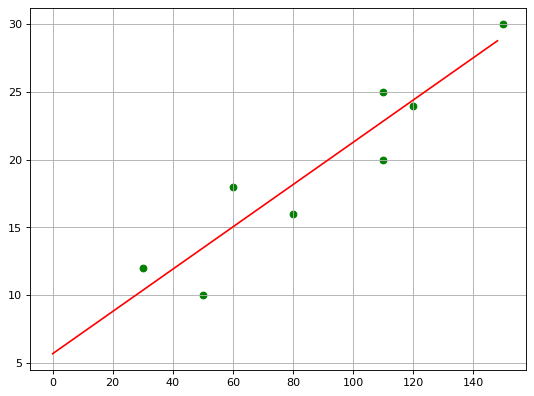

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)

x_line = np.arange(1, 150)
y_line = lr.predict(x_line)

plt.grid()
plt.scatter(x_train, y_train, c="green")
plt.plot(y_line, c="red")
plt.show()